In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
df1 = pd.read_csv('customer_data.csv')
df2 = pd.read_csv('payment_data.csv')
#join two tables
df3 = pd.merge(df1, df2.rename(columns = {'id':'id'}), on = 'id', how = 'left')
display(df3)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0,NaN
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015


             label            id        fea_1        fea_2        fea_3  \
count  8250.000000  8.250000e+03  8250.000000  7222.000000  8250.000000   
mean      0.168121  5.782173e+07     5.522667  1286.156813     2.319636   
std       0.373997  1.822724e+06     1.388358    52.002429     0.887414   
min       0.000000  5.498235e+07     1.000000  1116.500000     1.000000   
25%       0.000000  5.499050e+07     4.000000  1248.500000     1.000000   
50%       0.000000  5.898905e+07     5.000000  1283.000000     3.000000   
75%       0.000000  5.899655e+07     7.000000  1317.500000     3.000000   
max       1.000000  5.900624e+07     7.000000  1481.000000     3.000000   

              fea_4        fea_5        fea_6        fea_7        fea_8  ...  \
count  8.250000e+03  8250.000000  8250.000000  8250.000000  8250.000000  ...   
mean   1.386712e+05     1.940848    11.013939     4.881091   100.026303  ...   
std    1.081565e+05     0.235922     2.694611     3.031902    12.540081  ...   
min 

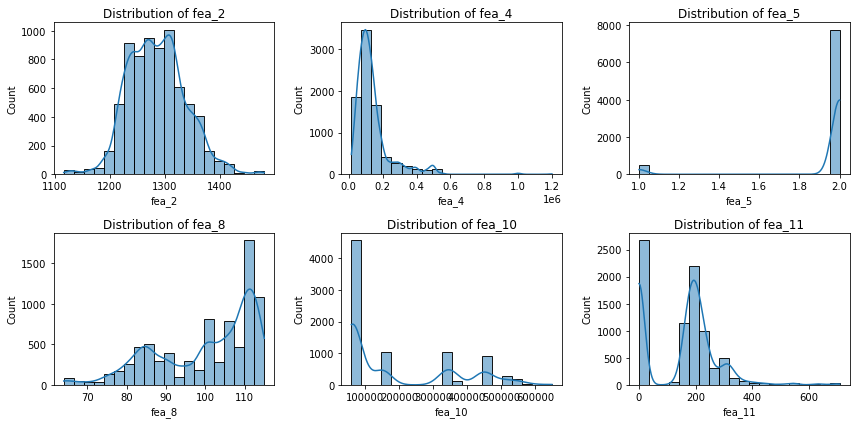

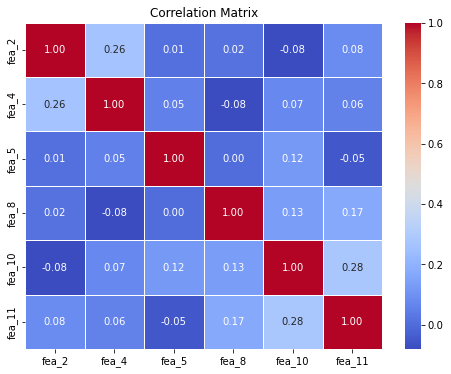

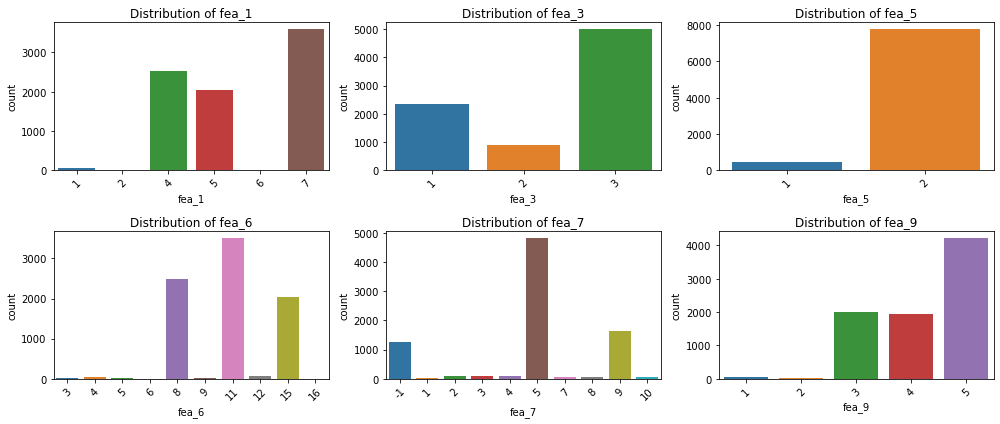

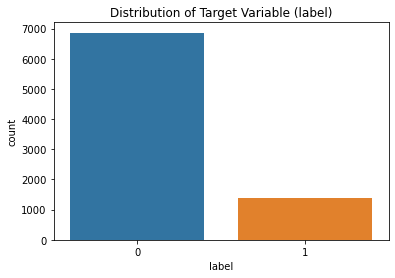

In [28]:
#Data exploration and visualization
# Display basic statistics of your dataset
print(df3.describe())

# Check the first few rows of the dataset
print(df3.head())

# Check the data types of columns
print(df3.dtypes)

# Check for missing values
print(df3.isnull().sum())

# Visualize the distribution of numerical features
numerical_features = ['fea_2', 'fea_4', 'fea_5', 'fea_8', 'fea_10', 'fea_11']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df3[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualize the correlation matrix for numerical features
correlation_matrix = df3[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Visualize the distribution of categorical features
categorical_features = ['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df3, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the target variable distribution (e.g., 'label')
plt.figure(figsize=(6, 4))
sns.countplot(data=df3, x='label')
plt.title('Distribution of Target Variable (label)')
plt.show()

In [30]:
#Deal with missing values/NA
def count_missing_values(dataframe):
    """
    Count missing values in each column of a pandas DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series containing the count of missing values for each column.
    """
    missing_values = dataframe.isna().sum()
    return missing_values

missing_counts = count_missing_values(df3)
print(missing_counts)

label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64


In [31]:
#drop the column that contain too many missing values
df4 = df3.drop(columns = ['prod_limit'])

In [32]:
#find out which colomns have missing values or NA
col_with_missing = []
for col in df4.columns:
    if df4[col].isna().sum()>0:
        col_with_missing.append(col)
print(col_with_missing)

['fea_2', 'update_date', 'highest_balance', 'report_date']


In [33]:
# Fill missing values in the numerical column with the mean
df4['highest_balance'].fillna(df4['highest_balance'].mean(), inplace=True)
df4['fea_2'].fillna(df4['fea_2'].mean(), inplace=True)
# Convert string columns to datetime objects
df4['update_date'] = pd.to_datetime(df4['update_date'], format='%d/%m/%Y')
df4['report_date'] = pd.to_datetime(df4['report_date'], format='%d/%m/%Y')

# Fill missing values with forward fill (ffill)
df4['update_date'].fillna(method='ffill', inplace=True)
df4['report_date'].fillna(method='ffill', inplace=True)

In [34]:
#Apply feature engineering on the two date columns
df4['update_year'], df4['update_month'], df4['update_day'], df4['update_day_of_week'] = (
    df4['update_date'].dt.year,
    df4['update_date'].dt.month,
    df4['update_date'].dt.day,
    df4['update_date'].dt.dayofweek
)

df4['report_year'], df4['report_month'], df4['report_day'], df4['report_day_of_week'] = (
    df4['report_date'].dt.year,
    df4['report_date'].dt.month,
    df4['report_date'].dt.day,
    df4['report_date'].dt.dayofweek
)

In [35]:
numerical_features = ['fea_2', 'fea_4', 'fea_5', 'fea_8', 'fea_10', 'fea_11']
X_numerical = df4[numerical_features]

In [39]:
df5 = pd.get_dummies(df4, columns=['fea_1', 'fea_3', 'fea_5', 'fea_6', 'fea_7', 'fea_9'], drop_first=True)
df5.columns
X_columns_encoded = df5[['fea_1_2', 'fea_1_4', 'fea_1_5', 'fea_1_6', 'fea_1_7', 'fea_3_2', 'fea_3_3',
                        'fea_5_2', 'fea_6_4', 'fea_6_5', 'fea_6_6', 'fea_6_8', 'fea_6_9', 
                        'fea_6_11', 'fea_6_12', 'fea_6_15', 'fea_6_16', 'fea_7_1', 'fea_7_2',
                        'fea_7_3', 'fea_7_4', 'fea_7_5', 'fea_7_7', 'fea_7_8', 'fea_7_9',
                         'fea_7_10', 'fea_9_2', 'fea_9_3', 'fea_9_4', 'fea_9_5']]
X = pd.concat([X_numerical, X_columns_encoded], axis=1)

In [40]:
#logistic test
y = df5['label']  # This is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,zero_division='warn')
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8387878787878787
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1384
           1       0.00      0.00      0.00       266

    accuracy                           0.84      1650
   macro avg       0.42      0.50      0.46      1650
weighted avg       0.70      0.84      0.77      1650

Confusion Matrix:
 [[1384    0]
 [ 266    0]]


/Users/xzh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xzh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xzh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#random forest
model = RandomForestClassifier(random_state=42)  # we can adjust hyperparameters here
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9963636363636363
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1384
           1       1.00      0.98      0.99       266

    accuracy                           1.00      1650
   macro avg       1.00      0.99      0.99      1650
weighted avg       1.00      1.00      1.00      1650

Confusion Matrix:
 [[1383    1]
 [   5  261]]


In [42]:
#Xgboost
model = xgb.XGBClassifier(random_state=42)  # we can adjust hyperparameters here
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9951515151515151
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1384
           1       0.99      0.98      0.98       266

    accuracy                           1.00      1650
   macro avg       0.99      0.99      0.99      1650
weighted avg       1.00      1.00      1.00      1650

Confusion Matrix:
 [[1382    2]
 [   6  260]]


In [43]:
#SVM test
model = SVC(kernel='rbf', C=1000,random_state=42)  # we can choose different kernels like 'linear', 'rbf', or 'poly'
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8387878787878787
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1384
           1       0.00      0.00      0.00       266

    accuracy                           0.84      1650
   macro avg       0.42      0.50      0.46      1650
weighted avg       0.70      0.84      0.77      1650

Confusion Matrix:
 [[1384    0]
 [ 266    0]]


/Users/xzh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xzh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xzh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
